# PageRank
En este cuaderno ampliarás tus conocimientos sobre vectores y valores propios explorando el algoritmo PageRank.
El cuaderno consta de dos partes: la primera es una hoja de ejercicios que te ayudará a familiarizarte con el funcionamiento del algoritmo. En ella analizaremos una microinternet con menos de 10 sitios web y veremos qué hace y qué puede fallar.
La segunda es una evaluación que pondrá a prueba tu aplicación de la teoría de eigentheory a este problema escribiendo código y calculando el page rank de una gran red que representa una subsección de Internet.

## Parte 1 - Hoja de ejercicios
### Introducción

PageRank (desarrollado por Larry Page y Sergey Brin) revolucionó la búsqueda en la web al generar una lista clasificada de páginas web basada en la conectividad subyacente de la web.
una lista ordenada de páginas web basada en la conectividad subyacente de la web. El algoritmo PageRank
El algoritmo PageRank se basa en un internauta aleatorio ideal que, al llegar a una página, pasa a la siguiente haciendo clic en un enlace.  

El internauta tiene la misma probabilidad de hacer clic en cualquier enlace de la página y, cuando llega a una página sin enlaces, tiene la misma probabilidad de pasar a la siguiente haciendo clic en un enlace.

Enlaces, tiene la misma probabilidad de pasar a cualquier otra página tecleando su URL. Además, el internauta puede
optar ocasionalmente por teclear una URL aleatoria en lugar de seguir los enlaces de una página. El PageRank es es el orden de clasificación de las páginas, desde la más probable hasta la menos probable.


In [3]:
# Before we begin, let's load the libraries.
%pylab notebook
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


### PageRank como problema de álgebra lineal
Imaginemos una micro-internet, con sólo 6 sitios web (**A**vocado, **B**ullseye, **C**atBabel, **D**romeda, **e**Tings, and **F**aceSpace).
Cada sitio web enlaza con algunos de los demás, formando una red como la que se muestra,

![Micro-Internet](readonly/internet.png "Micro-Internet")

El principio de diseño de PageRank es que los sitios web importantes serán enlazados por otros sitios web importantes.
Este principio, en cierto modo recursivo, será la base de nuestro razonamiento.

Imaginemos que en nuestra microinternet hay 100 *Usuarios procrastinadores*, cada uno de los cuales ve un solo sitio web a la vez.
Cada minuto, los *Usuarios* siguen un enlace de su sitio web a otro sitio de la microinternet.
Al cabo de un tiempo, los sitios web con más enlaces tendrán más usuarios que los visiten y, a largo plazo, cada minuto por cada usuario que abandone un sitio web entrará otro, manteniendo constante el número total de usuarios de cada sitio web.
El PageRank es simplemente la clasificación de los sitios web según el número de usuarios que tienen al final de este proceso.


Representamos el número de usuarios en cada sitio web con el vector,
$$\mathbf{r} = \begin{bmatrix} r_A \\ r_B \\ r_C \\ r_D \\ r_E \\ r_F \end{bmatrix}$$
Y decir que el número de usuarios en cada página web en el minuto $i+1$ está relacionado con los del minuto $i$ por la transformación matricial

$$ \mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$
con la matriz $L$ tomando la forma,
$$ L = \begin{bmatrix}
L_{A→A} & L_{B→A} & L_{C→A} & L_{D→A} & L_{E→A} & L_{F→A} \\
L_{A→B} & L_{B→B} & L_{C→B} & L_{D→B} & L_{E→B} & L_{F→B} \\
L_{A→C} & L_{B→C} & L_{C→C} & L_{D→C} & L_{E→C} & L_{F→C} \\
L_{A→D} & L_{B→D} & L_{C→D} & L_{D→D} & L_{E→D} & L_{F→D} \\
L_{A→E} & L_{B→E} & L_{C→E} & L_{D→E} & L_{E→E} & L_{F→E} \\
L_{A→F} & L_{B→F} & L_{C→F} & L_{D→F} & L_{E→F} & L_{F→F} \\
\end{bmatrix}
$$
donde las columnas representan la probabilidad de abandonar un sitio web por cualquier otro, y suman uno.
Las filas determinan la probabilidad de entrar en un sitio web desde cualquier otro, aunque no es necesario que sumen uno.
El comportamiento a largo plazo de este sistema es cuando $ \mathbf{r}^{i+1)} = \mathbf{r}^{(i)}$, por lo que vamos a eliminar los superíndices aquí, y que nos permite escribir,
$$ L \,\mathbf{r} = \mathbf{r}$$

que es una ecuación de valores propios para la matriz $L$, con valor propio 1 (esto está garantizado por la estructura probabilística de la matriz $L$).

Completa la matriz $L$ a continuación, hemos omitido la columna de los sitios web a los que enlaza el sitio web *FaceSpace* (F).
Recuerde, esta es la probabilidad de hacer clic en otro sitio web de éste, por lo que cada columna debe sumar uno (escalando por el número de enlaces).

In [4]:
# Sustituya aquí el ??? por la probabilidad de hacer 
# clic en un enlace a cada sitio web al salir del sitio web F (FaceSpace).
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0],
              [0,   0,   1/3, 0, 0,   0 ]])

En principio, podríamos utilizar una biblioteca de álgebra lineal, como la que se muestra a continuación, para calcular los valores propios y los vectores.
Y esto funcionaría para un sistema pequeño. Pero esto se vuelve inmanejable para grandes sistemas.
Y puesto que sólo se preocupan por el principal vector propio (el que tiene el mayor valor propio, que será 1 en este caso), podemos utilizar el * método de iteración de potencia * que se escala mejor, y es más rápido para los grandes sistemas.

Utilice el código de abajo para echar un vistazo a la PageRank para este micro-internet.

In [5]:
eVals, eVecs = la.eig(L) # Obtiene los valores propios y los vectores
order = np.absolute(eVals).argsort()[::-1] # Las ordena por sus valores propios
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Establece r como el vector propio principal
100 * np.real(r / np.sum(r)) # Haz que este vector propio sume uno, luego multiplícalo por 100 Usuarios procrastinadores

array([ 16.        ,   5.33333333,  40.        ,  25.33333333,
         0.        ,  13.33333333])

Podemos ver en esta lista, el número de Usuarios Procrastinadores que esperamos encontrar en cada sitio web después de mucho tiempo.
Poniéndolos en orden de *popularidad* (basado en esta métrica), el PageRank de esta micro-internet es:

**C**atBabel, **D**romeda, **A**vocado, **F**aceSpace, **B**ullseye, **e**Tings

Volviendo al diagrama de la microinternet, ¿es esto lo que esperabas?
Convénzase de que, basándose en las páginas que parecen importantes y en los enlaces que llevan a ellas, se trata de una clasificación razonable.

Intentemos ahora obtener el mismo resultado utilizando el método Power-Iteration que se trató en el vídeo.
Este método será mucho mejor cuando se trate de sistemas grandes.

En primer lugar vamos a establecer nuestro vector inicial, $\mathbf{r}^{(0)}$, de modo que tenemos nuestros 100 Usuarios Procrastinadores distribuidos por igual en cada uno de nuestros 6 sitios web.

In [6]:
r = 100 * np.ones(6) / 6 # Establece este vector (6 entradas de 1/6 × 100 cada una)
r # Muestra su valor

array([ 16.66666667,  16.66666667,  16.66666667,  16.66666667,
        16.66666667,  16.66666667])

A continuación, actualicemos el vector al minuto siguiente, con la matriz $L$.
Ejecute la siguiente celda varias veces, hasta que la respuesta se estabilice.

In [7]:
r = L @ r # Aplicar matriz L a r
r # Mostrar su valor
# Reejecutar esta celda varias veces para converger a la respuesta correcta.

array([ 13.88888889,  13.88888889,  38.88888889,  27.77777778,
         0.        ,   5.55555556])

Podemos automatizar la aplicación de esta matriz varias veces de la siguiente manera,

In [8]:
r = 100 * np.ones(6) / 6 
# Establece este vector (6 entradas de 1/6 × 100 cada una)
# Repite 100 veces
for i in np.arange(100) : 
    r = L @ r
r

array([ 16.        ,   5.33333333,  40.        ,  25.33333333,
         0.        ,  13.33333333])

O mejor aún, podemos seguir corriendo hasta llegar a la tolerancia requerida.

In [9]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


array([ 16.00149917,   5.33252025,  39.99916911,  25.3324738 ,
         0.        ,  13.33433767])

Vea cómo el orden PageRank se establece con bastante rapidez, y el vector converge en el valor que calculamos anteriormente después de unas pocas decenas de repeticiones.

¡Enhorabuena! Acaba de calcular su primer PageRank.

### Damping Parameter
The system we just studied converged fairly quickly to the correct answer.
Let's consider an extension to our micro-internet where things start to go wrong.

Say a new website is added to the micro-internet: *Geoff's* Website.
This website is linked to by *FaceSpace* and only links to itself.
![An Expanded Micro-Internet](readonly/internet2.png "An Expanded Micro-Internet")

Intuitively, only *FaceSpace*, which is in the bottom half of the page rank, links to this website amongst the two others it links to,
so we might expect *Geoff's* site to have a correspondingly low PageRank score.

Build the new $L$ matrix for the expanded micro-internet, and use Power-Iteration on the Procrastinating Pat vector.
See what happens…

In [10]:
 # We'll call this one L2, to distinguish it from the previous L.
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   1/3, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 1/3, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   0, 0 ],
               [0,   0,   0,   0, 0,   1/3, 1 ]])

In [11]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

131 iterations to convergence.


array([  0.03046998,   0.01064323,   0.07126612,   0.04423198,
         0.        ,   0.02489342,  99.81849527])

¡Eso no es bueno! Parece que *Geoff* se está llevando todo el tráfico de la micro-internet, y de alguna manera llega a la cima del PageRank.
Este comportamiento puede entenderse, porque una vez que un Usuario llega al sitio web de *Geoff*, no puede salir, ya que todos los enlaces vuelven a Geoff.

Para combatir esto, podemos añadir una pequeña probabilidad de que los Usuarios no sigan ningún enlace en una página web, sino que visiten un sitio web en la micro-internet al azar.
Diremos que la probabilidad de que sigan un enlace es $d$ y la probabilidad de que elijan un sitio web al azar es, por tanto, $1-d$.
Podemos utilizar una nueva matriz para calcular qué sitios visitan los Usuarios cada minuto.
$$ M = d \, L + \frac{1-d}{n} \, J $$
donde $J$ es una matriz $n \times n$ donde cada elemento es uno.

Si $d$ es uno, tenemos el caso que teníamos anteriormente, mientras que si $d$ es cero, siempre visitaremos una página web al azar y, por tanto, todas las páginas web tendrán la misma probabilidad y la misma clasificación.
Para que esta extensión funcione mejor, $1-d$ debe ser algo pequeño, aunque no entraremos a discutir cómo de pequeño exactamente.

Volvamos a probar este PageRank con esta extensión.

In [12]:
d = 0.5 # Siéntase libre de jugar con este parámetro después de ejecutar el código una vez.
M = d * L2 + (1-d)/7 * np.ones([7, 7]) # np.ones() es la matriz J, con unos para cada entrada

In [13]:
r = 100 * np.ones(7) / 7 # Establece este vector (6 entradas de 1/6 × 100 cada una)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

8 iterations to convergence.


array([ 13.68217054,  11.20902965,  22.41964343,  16.7593433 ,
         7.14285714,  10.87976354,  17.90719239])

Esto es ciertamente mejor, el PageRank da números sensatos para los Usuarios Pronisticadores que terminan en cada página web.
Sin embargo, este método sigue prediciendo que Geoff tiene una página web de alto rango.
Esto podría considerarse una consecuencia del uso de una red pequeña. También podríamos evitar el problema no contando los autoenlaces al producir la matriz L (y si un sitio web no tiene enlaces salientes, hacer que enlace a todos los sitios web por igual).
No profundizaremos más en este tema, ya que pertenece al ámbito de las mejoras del PageRank y no al de los problemas propios.

Ahora está en una buena posición, después de haber adquirido una comprensión de PageRank, para producir su propio código para calcular el PageRank de un sitio web con miles de entradas.

Buena suerte.

## Parte 2 - Evaluación
En esta evaluación se le pedirá que produzca una función que pueda calcular el PageRank para una matriz de probabilidad arbitrariamente grande.
Esta evaluación, la última del curso, le proporcionará menos orientación que las anteriores.
Deberá utilizar el código de la hoja de ejercicios anterior y adaptarlo a sus necesidades.

### Cómo enviar
Edite el código de la celda siguiente para completar la tarea.
Una vez que haya terminado y esté satisfecho, pulse el botón *Enviar tarea* en la parte superior de este cuaderno.

Por favor, no cambie los nombres de las funciones, ya que serán comprobados por el script de calificación.

Si tienes más preguntas sobre los envíos o las tareas de programación, aquí tienes una [lista](https://www.coursera.org/learn/linear-algebra-machine-learning/discussions/weeks/1/threads/jB4klkn5EeibtBIQyzFmQg) de preguntas y respuestas. También puedes plantear una cuestión en el foro de debate. Mucha suerte.

In [14]:
# PACKAGE
# Here are the imports again, just in case you need them.
# There is no need to edit or submit this cell.
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

In [15]:
# GRADED FUNCTION
# Completa esta función para proporcionar el PageRank para un Internet de tamaño arbitrario.
# Es decir, el vector propio principal del sistema amortiguado, utilizando el método de iteración de potencia.
# (La normalización no importa aquí)
# Las entradas de la función son la matriz de enlace y d el parámetro de amortiguamiento - como se define 
# en esta hoja de cálculo.
# (El parámetro de amortiguamiento, d, será fijado por la función - no es necesario fijarlo usted mismo).
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d) / n * np.ones([n, n]) 
    r = 100 * np.ones(n) / n
    lastR = r
    r = M @ r
    while la.norm (lastR - r) > 0.01 :
        lastR = r
        r = M @ r
    
    return r


## Prueba tu código antes de enviarlo
Para probar el código que has escrito arriba, ejecuta la celda (selecciona la celda de arriba, luego pulsa el botón de reproducción [ ▶| ] o pulsa mayúsculas-entrada).
A continuación, puedes utilizar el código siguiente para probar tu función.
No necesitas enviar esta celda; puedes editarla y ejecutarla tanto como quieras.

In [16]:
# Use the following function to generate internets of different sizes.
generate_internet(5)

array([[ 0.2,  0.2,  0. ,  0.2,  0. ],
       [ 0.2,  0.2,  0.5,  0.2,  0. ],
       [ 0.2,  0.2,  0. ,  0.2,  1. ],
       [ 0.2,  0.2,  0.5,  0.2,  0. ],
       [ 0.2,  0.2,  0. ,  0.2,  0. ]])

In [17]:
# Test your PageRank method against the built in "eig" method.
# You should see yours is a lot faster for large internets
L = generate_internet(10)

In [18]:
pageRank(L, 1)

array([  0.00000001,  32.0821161 ,  16.04025175,  16.0442989 ,
         0.00000002,   0.00000002,   0.00000002,   0.00000001,
        35.83333317,   0.00000001])

In [19]:
# Do note, this is calculating the eigenvalues of the link matrix, L,
# without any damping. It may give different results that your pageRank function.
# If you wish, you could modify this cell to include damping.
# (There is no credit for this though)
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([  0.00000001,  35.24027919,  17.62013959,  17.62013961,
         0.00000002,   0.00000002,   0.00000002,   0.00000001,
        29.51944153,   0.00000001])

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


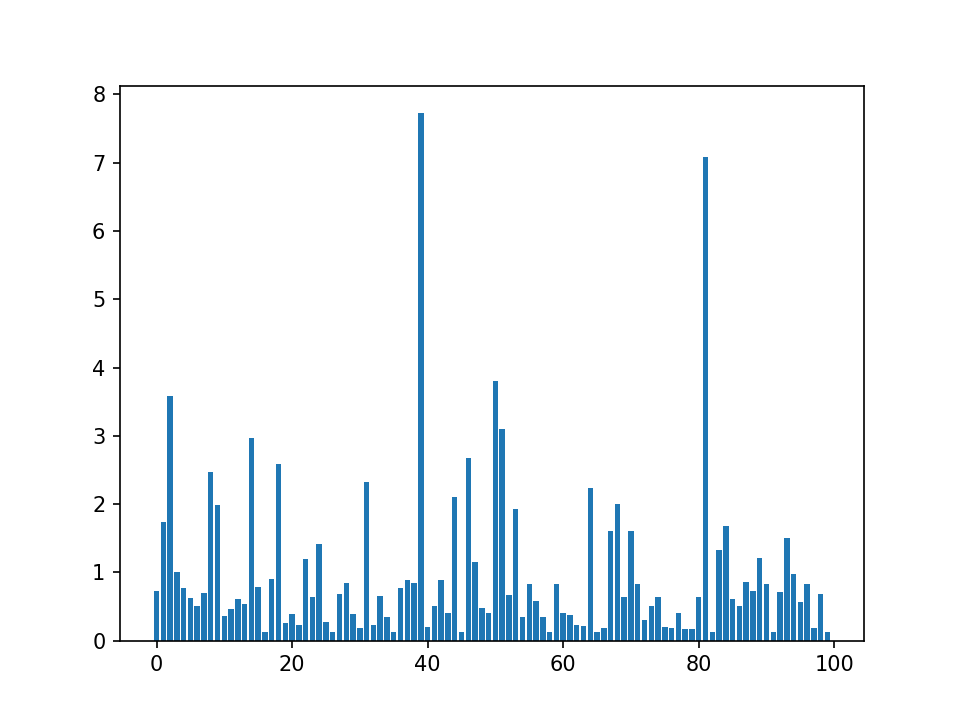

In [21]:
# You may wish to view the PageRank graphically.
# This code will draw a bar chart, for each (numbered) website on the generated internet,
# The height of each bar will be the score in the PageRank.
# Run this code to see the PageRank for each internet you generate.
# Hopefully you should see what you might expect
# - there are a few clusters of important websites, but most on the internet are rubbish!
%pylab notebook
r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);